<b>Vinicius F. Caridá</b>

<h1 style="text-align:center"> Machine Learning Hands-On </h1>

<h3 class="title"> Links úteis: </h3>
<br>
<ol>
  <li class="item"><a href = "http://scikit-learn.org/stable/"> Sklearn</a>: principal biblioteca de aprendizado de máquina para python.</li>
  <li class="item"><a href = "http://pandas.pydata.org/pandas-docs/stable/"> Pandas</a>: (quase) tudo o que você precisa para trabalhar rapidamente com tabelas</li>
  <li class="item"><a href = "https://docs.scipy.org/doc/numpy/reference/index.html"> Numpy</a>: funções matemáticas estão aqui</li>
  <li class="item"><a href = "https://matplotlib.org/contents.html"> Matplotlib</a>: te ajuda a plotar!</li>
  <li class="item"><a href = "https://seaborn.pydata.org/api.html"> Seaborn</a>: Deixa a matplotlib bonita (contém plots mais bem estruturados)</li>
</ol>

<b>Trabalharemos com as seguintes bases de dados:</b>
- iris.csv
- lenses_final.csv
- car.data
- horse-colic.data
- PETR4.SA.csv
- Boston.csv
- artificial_data

<b>Testem a leitura de um dos arquivos deste curso</b>
- Acessem a documentação da função <i>read_csv</i> do <i>pandas</i>: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

In [2]:
iris            = pd.read_csv("./data/iris.csv")
lenses          = pd.read_csv("./data/lenses_final.csv")
car             = pd.read_csv("./data/cars.csv")
horsecolic      = pd.read_table("./data/horse-colic.data")

C:\Users\vinicius\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


<h2 style="text-align:center; margin:40px"> Máquinas de Vetores de Suporte (SVM) </h2>

![](img/svm.png)

O algoritmo de <b>SVM</b> tem como objetivo encontrar a <b>superfície separadora (hiperplano) que maximiza a distância entre as margens</b> (retas tracejadas). Isso permite separar as duas classes da melhor maneira possível.

<h4> Equação do Plano (2D): $ax + by + c = 0$ </h4>

<h4> Podemos re-escrever como: $w_1x_1 + w_2x_2 + b = 0$ </h4>

<h4> Equação do Plano (m dimensões): $w \cdot x + b = 0$ </h4>

<h4> As duas margens são dadas por: $w \cdot x + b = \pm1$ </h4>

<h4> Distância entre as margens: $d = \frac{2}{||w||}$ </h4>

<h4> Então nosso objetivo é:<br/>$\min_{w}{||w||}$ <br/>sujeito a $y_i (w \cdot x_i + b) >= 1$</h4>

<h4> Para permitir pequenos erros, adicionamos variáveis de folga:
<br/>$\min_{w,\eta}{||w||} + C\sum{\eta_i}$ <br/>sujeito a $y_i (w \cdot x_i + b) >= 1 - \eta_i$</h4>

<h3 style="text-align:center; margin:40px"> E se não houver separação linear entre as duas classes? </h3>

<h4>Kernel Trick</h4>
É o nome dado para uma técnica que envolve mapear os dados para um espaço diferente, geralmente de dimensão mais alta, de forma que neste espaço os dados sejam linearmente separáveis. Ou seja, substituímos cada $x_i$ por $\phi(x_i)$

![](img/kernel1.png)

<h4> O novo espaço pode ter dimensão infinita! </h4>
Não precisamos de fato mapear os pontos no novo espaço! Para resolver o SVM, basta conhecer o produto escalar das observações no novo espaço, ou seja, o resultado de $\phi(x_i)\cdot\phi(x_j)$, que geralmente chamamos de <b>Kernel</b>:

$K(x_i, x_j) = \phi(x_i)\cdot\phi(x_j)$

<h4> Principais kernels: </h4>
<ul>
    <li>Linear: $K(x_i, x_j) = x_i \cdot x_j$</li>
    <li>Polinomial: $K(x_i, x_j) = (\delta(x_i \cdot x_j) + k)^d$</li>
    <li>Gaussiano: $K(x_i, x_j) = e^{-\gamma||x_i-x_j||^2}$</li>
    <li>Sigmoidal: $K(x_i, x_j) = tanh(\delta(x_i \cdot x_j) + k)$</li>
</ul>

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). Iremos ver como a escolha do <b>kernel</b> e dos parâmetros é <b>muito</b> importante para o resultado do algoritmo.

In [3]:
from sklearn.svm import SVC

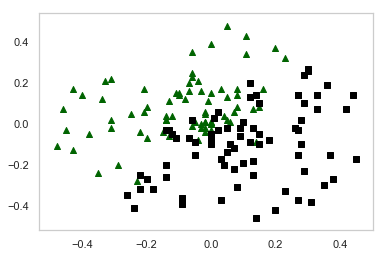

In [4]:
baseDados = pd.read_csv('data/base_regressao_logistica.csv')
plt.scatter(baseDados.X1[baseDados.Y == 0], baseDados.X2[baseDados.Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[baseDados.Y == 1], baseDados.X2[baseDados.Y == 1], c = 'black', marker = ',')

In [5]:
#SVM = SVC(kernel = 'linear', C = 1)
SVM = SVC()
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
SVM.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

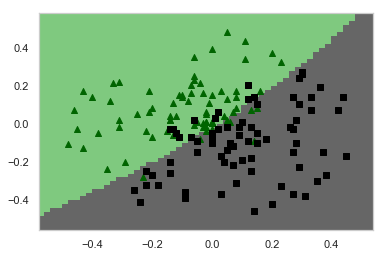

In [6]:
x_min, x_max = baseDados.X1.min() - .1, baseDados.X1.max() + .1
y_min, y_max = baseDados.X2.min() - .1, baseDados.X2.max() + .1
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = SVM.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = ',')